In [7]:
from NFandist import calc_Z
import numpy as np
Z=calc_Z(500,10)
Z0=1/(2 * np.sinh(5))
print(Z0)
print(Z/Z0)

0.006738252915294544
1.0000833406234217


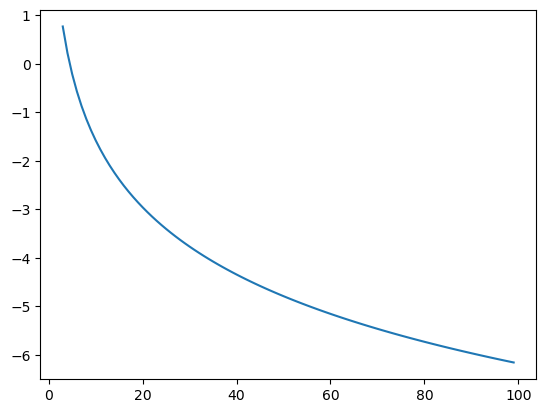

In [16]:
from NFandist import calc_Z
import numpy as np
import matplotlib.pyplot as plt
Z0=1/(2 * np.sinh(5))
N=np.array(list(range(3,100)))
Z=np.array([calc_Z(N[_],10) for _ in range(len(N))])
delta=np.log(Z/Z0-1)
fig=plt.figure()
plt.plot(N,delta)
plt.show()

In [2]:
from NFandist import calc_G
g=calc_G(32,10,2)
print(g)

[0.49405272 0.36192638]


In [5]:
from NFandist import calc_Kin
print(calc_Kin(1000,10))

0.25001957671517694


In [57]:
from NFoscillator import Oscillator
from NFrel_oscillator import Rel_Oscillator
from NFur_oscillator import Ur_Oscillator
from Data import train_loader
import torch
batch=next(iter(train_loader))
KL_osc=Oscillator.make_KL(Oscillator)
KL_rel=Rel_Oscillator.make_KL(Rel_Oscillator,sigma=0.0001)
KL_ur=Ur_Oscillator.make_KL(Ur_Oscillator)
osc=Oscillator()
rel=Rel_Oscillator(sigma=10000)
ur=Ur_Oscillator()
#print(torch.mean(rel.T(batch)-ur.T(batch)))
#print(rel.normalizer-ur.normalizer)
print(KL_osc(batch,0)-KL_rel(batch,0))

tensor(0.0062)


In [16]:
import torch
import numpy as np 
from NFconstants import N_nod, beta
from NFandist import get_C, calc_Z, get_diag
from Data import train_loader
from NFoscillator import Oscillator

KL_osc=Oscillator.make_KL(Oscillator)
C=get_C(N_nod,beta)
C=(torch.tensor(C).float())
Ct=torch.t(C)
x=torch.matmul(batch2,Ct)
d=np.array(get_diag(N_nod,beta))
det_C=torch.tensor(np.prod(d))
Z=torch.tensor(calc_Z(N_nod,beta))
print(KL_osc(x,torch.log(det_C))+torch.log(Z))


tensor(-0.0122, dtype=torch.float64)


In [1]:
from NFconstants import N_nod, beta
from NFandist import get_C, calc_Z
C=get_C(N_nod,beta)
print(C)

[[ 0.31622777  0.04881826  0.37884258 ...  0.          0.06936547
   0.        ]
 [ 0.31622777 -0.04881826  0.37156323 ...  0.02692516 -0.06803264
   0.01353253]
 [ 0.31622777  0.04881826  0.35000491 ... -0.04975121  0.06408534
  -0.02654502]
 ...
 [ 0.31622777 -0.04881826  0.3149961  ... -0.06500309 -0.05767528
  -0.03853739]
 [ 0.31622777  0.04881826  0.35000491 ...  0.04975121  0.06408534
   0.02654502]
 [ 0.31622777 -0.04881826  0.37156323 ... -0.02692516 -0.06803264
  -0.01353253]]


In [13]:
import torch
import numpy as np
from NFandist import get_T
N_traj=2**11
N_nod=32
T=torch.tensor(get_T(N_nod)).float()
def G(X,n_p=N_nod):
    G=np.zeros((n_p))
    Y=X.clone()
    Xt=torch.t(X)
    for s in range(n_p):
        G[s]=torch.trace(torch.matmul(Y,Xt))
        Y=torch.matmul(Y,T)
    return G/(N_traj*N_nod)
#g_nf=G(trajs)

In [14]:
from NFandist import calc_G
from NFconstants import N_nod, NG_points,beta
g_osc=calc_G(N_nod,10)


In [15]:
from NFandist import get_C, calc_Z
C=get_C(32,10)

In [29]:
#import numpy as np
from NFoscillator import Oscillator
from NFandist import get_O, get_diag, get_C
import torch
from Data import train_loader
"""
mask=np.zeros((32))
for i in range(32):
    if i%8<2:
        mask[i]=1
mask1=np.ones((32))
mask1=mask1-mask
"""
ind=[]
ind1=[]
for i in range(32):
    if i%4<2:
        ind.append(i)
    else:
        ind1.append(i)
O=(torch.tensor(get_O(32)).float())
Ot=torch.t(O)
#C=(torch.tensor(get_C(32,10)).float())
#Ct=torch.t(C)

Diag=(torch.tensor(get_diag(32,10)).float())
diag=(torch.tensor(get_diag(16,10)).float())  #Diag[ind]
diag1=Diag[ind1]
print(len(diag))
#z=torch.ones(32)
z=next(iter(train_loader))
Z=torch.matmul(z,Ct)
z[:,ind]=z[:,ind]*diag
z[:,ind1]=z[:,ind1]*diag1
z=torch.matmul(z,Ot)

#z=next(iter(train_loader))
Z=torch.matmul(z,Ct)
g_nf=G(z)

16


0.4836491048336029


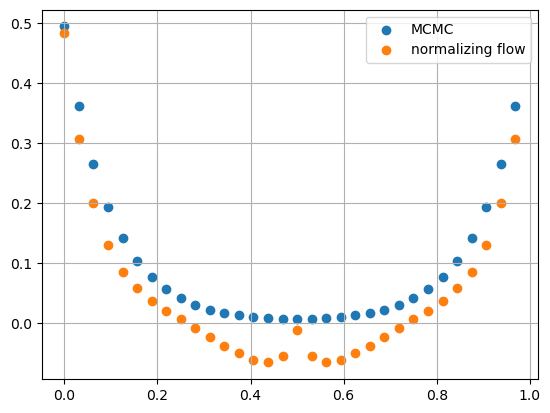

In [30]:
import matplotlib.pyplot as plt
g=g_osc
print(g_nf[0])
fig=plt.figure()
MCMC_list=np.arange(len(g))/len(g)
NF_list=np.arange(len(g_nf))/len(g_nf)
plt.scatter(MCMC_list,g)
plt.scatter(NF_list,g_nf)
plt.legend(["MCMC","normalizing flow"])
plt.grid(True)
plt.show()

In [40]:
IND1=[]
IND2=[]
for i in range(16):
    if i%4<2:
        IND1.append(i)
    else:
        IND2.append(i)
ind1=[]
ind2=[]
ind3=[]
ind4=[]
for i in range(8):
    if i%4<2:
        ind1.append(IND1[i])
    else:
        ind2.append(IND1[i])
for i in range(8):
    if i%4<2:
        ind3.append(IND2[i])
    else:
        ind4.append(IND2[i])        

mask1=IND1
mask2=ind2+ind3
mask3=IND2
print(mask1,mask2,mask3)

[0, 1, 4, 5, 8, 9, 12, 13] [4, 5, 12, 13, 2, 3, 10, 11] [2, 3, 6, 7, 10, 11, 14, 15]
